In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import plotly.express as px

In [3]:
# to look at all columns in a dataframe
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('clusters.csv')

In [5]:
df.head()

,Cluster,index,SNRLGSVC,SNRLGIMP,SNRLDCSN,SNRLFRND,YEAR,CASEID,Tabacco_Flag,Alcohol_Flag,Marijunana_Flag,Marijuana_Only_Flag,Cocaine_Flag,Crack_Flag,Herion_Flag,Hallcinogens_Flag,Inhalants_Flag,Painkiller_Flag,Tranquilizer_Flag,Stimulant Flag,CPN_Meth_Flag,Meth_Flag,Sedatives Flag,Any_Drug_Flag,Any_Drug_Past_Year,Any_Drug_Past_Month,Age_First_Use,Year_First_Use,Drug_Not_Marijunana,Ever_Steal_50,Sell_Illegal_Drugs,Ever_Booked_Arrested,Drug_or_Alc_Past_year,inpatient,outpatient,needed_not_rcvd,rcvd_any_tmt,suic_thought_pst_12month,psych_distress_month,psych_distress_yr,suic_thought_pst_yr,suic_plan,suic_attempt,whodas_score,predicted_ment_ill,svrl_days_depressed,lifetime_mde,pst_yr_mde,CATAG6,HEALTH,IRSEX,IRMARIT,EDUCCAT2,NEWRACE2,EMPSTATY
0,2,0,6-24,Agree,Agree,Agree,2010,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,2005,0,0,0,No,No/Unknown,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,A-18-25,H_Very_good,Male,Not_Married,Some_college,Black/Afr_Am,E_full_time
1,0,1,3-5,Disagree,Disagree,Strongly Disagree,2010,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,14,1998,0,0,0,No,No/Unknown,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,20.0,0.0,0.0,1.0,1.0,A-18-25,H_Excellent,Female,Married,Some_college,White,E_full_time
2,1,2,99,99,99,99,2010,3,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,14,2009,0,0,0,No,No/Unknown,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,0.0,A-12-17,H_Good,Female,Not_Married,Edu_youth,Hispanic,E_Other
3,0,3,1-2,Agree,Agree,Disagree,2010,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,991,9999,0,0,0,No,No/Unknown,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,A-18-25,H_Fair,Female,Not_Married,Less_than_high_school,White,E_Other
4,0,4,6-24,Strongly Agree,Strongly Agree,Agree,2010,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,991,9999,0,0,0,Yes,No/Unknown,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,A-50-64,H_Fair,Female,Divorced_Separated,High_school_graduate,White,E_Unemployed


In [6]:
df.Cluster.value_counts()

Cluster
0    107751
1     98348
2     74226
Name: count, dtype: int64

In [7]:
suic = df[['Cluster','suic_thought_pst_12month', 'suic_thought_pst_yr', 'suic_plan', 'suic_attempt']]

In [8]:
suic_means = suic.groupby('Cluster').mean()
suic_means 

,suic_thought_pst_12month,suic_thought_pst_yr,suic_plan,suic_attempt
Cluster,,,,
0,0.959128,0.041670,0.012158,0.006088
1,0.953736,0.056209,0.017458,0.009477
2,0.928960,0.071269,0.022687,0.012462


# Permutation Testing

- **Null Hypothesis:** Both samples are drawn from the same population thus the observed tvd is due to chance alone.
- **Alternative Hypothesis:** Samples are drawn from two different populations thus the tvd is not due to chance alone, and there are other factors at hand. 

Under the null hypothesis both samples (cluster 0 & cluster 1) are sampled from the same population. If this is true then the group label `Cluster` will have no effect on the tvd.  

In [9]:
def total_variation_distance(dist1, dist2):
    '''Given two categorical distributions, 
    both sorted with same categories, calculates the TVD'''
    return np.sum(np.abs(dist1 - dist2)) / 2

## Cluster 0 and 1

In [10]:
test1 = df[(df['Cluster'] == 0) | (df['Cluster'] == 1)][['Cluster',
                                                        'suic_thought_pst_12month', 
                                                        'suic_thought_pst_yr',
                                                        'suic_plan', 
                                                        'suic_attempt']]
test1.head()

,Cluster,suic_thought_pst_12month,suic_thought_pst_yr,suic_plan,suic_attempt
1,0,1.0,0.0,0.0,0.0
2,1,1.0,0.0,0.0,0.0
3,0,1.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0
6,0,1.0,0.0,0.0,0.0


In [11]:
test1_means = test1.groupby('Cluster').mean()
test1_means.head()

,suic_thought_pst_12month,suic_thought_pst_yr,suic_plan,suic_attempt
Cluster,,,,
0,0.959128,0.041670,0.012158,0.006088
1,0.953736,0.056209,0.017458,0.009477


In [12]:
cluster_0 = suic_means.iloc[0]
cluster_1 = suic_means.iloc[1]
observed_tvd = total_variation_distance(cluster_0,cluster_1)
observed_tvd

0.014309944708445004

In [35]:
n_repetitions = 500

tvds = []
for _ in range(n_repetitions):
    
    # Step 1: Shuffle the clusters and store them in a DataFrame.
    with_shuffled = test1.assign(shuffled_clusters=np.random.permutation(test1['Cluster']))

    # Step 2: Compute the test statistic.
    # Remember, alphabetically, False comes before True,
    # so this computes True - False.
    cluster_props = with_shuffled = with_shuffled.groupby('shuffled_clusters').mean()
    test_statistic = total_variation_distance(cluster_props.iloc[0],cluster_props.iloc[1])
    
    # Step 4: Store the result
    tvds.append(test_statistic)
    
tvds[:10]

[0.0022889794517681823,
 0.002806561942052667,
 0.001284562566719646,
 0.0029319754120985717,
 0.0011863197024430446,
 0.0041858468800482565,
 0.003048100487847032,
 0.0022215336586966805,
 0.0033209495002460283,
 0.006112204842266014]

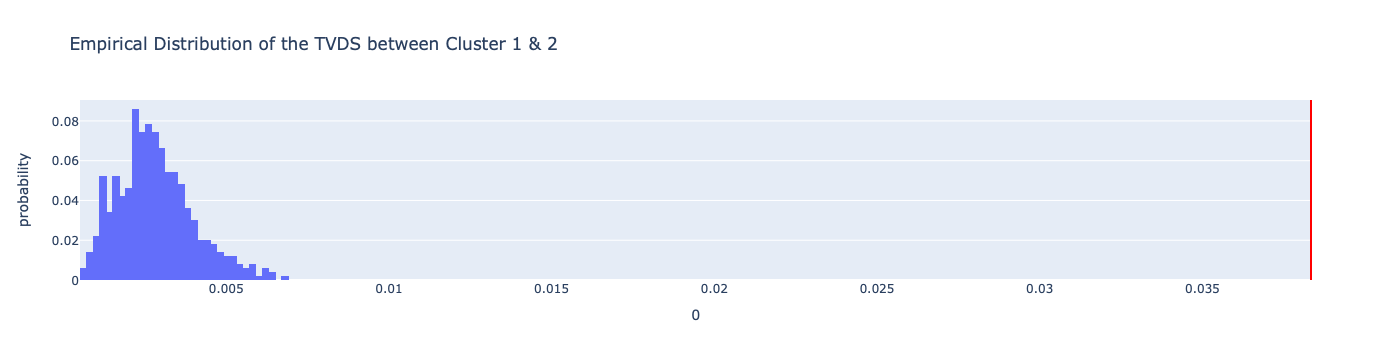

In [36]:
fig = px.histogram(pd.DataFrame(tvds), x=0, nbins=50, histnorm='probability', 
                   title='Empirical Distribution of the TVDS between Cluster 0 & 1')
fig.add_vline(x=observed_tvd, line_color='red')

In [38]:
p_val = (np.array(tvds) >= observed_tvd).mean()
p_val

0.0

# Between 0 and 2

In [39]:
test2 = df[(df['Cluster'] == 0) | (df['Cluster'] == 2)][['Cluster',
                                                        'suic_thought_pst_12month', 
                                                        'suic_thought_pst_yr',
                                                        'suic_plan', 
                                                        'suic_attempt']]
test2.head()

,Cluster,suic_thought_pst_12month,suic_thought_pst_yr,suic_plan,suic_attempt
0,2,1.0,0.0,0.0,0.0
1,0,1.0,0.0,0.0,0.0
3,0,1.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0
5,2,1.0,0.0,0.0,0.0


In [40]:
test2_means = test2.groupby('Cluster').mean()
test2_means.head()

,suic_thought_pst_12month,suic_thought_pst_yr,suic_plan,suic_attempt
Cluster,,,,
0,0.959128,0.041670,0.012158,0.006088
2,0.928960,0.071269,0.022687,0.012462


In [41]:
cluster_0 = test2_means.iloc[0]
cluster_2 = test2_means.iloc[1]
observed_tvd = total_variation_distance(cluster_0,cluster_2)
observed_tvd

0.03833505292544645

In [46]:
n_repetitions = 500

tvds = []
for _ in range(n_repetitions):
    
    # Step 1: Shuffle the clusters and store them in a DataFrame.
    with_shuffled = test2.assign(shuffled_clusters=np.random.permutation(test2['Cluster']))

    # Step 2: Compute the test statistic.
    # Remember, alphabetically, False comes before True,
    # so this computes True - False.
    cluster_props = with_shuffled = with_shuffled.groupby('shuffled_clusters').mean()
    test_statistic = total_variation_distance(cluster_props.iloc[0],cluster_props.iloc[1])
    
    # Step 4: Store the result
    tvds.append(test_statistic)
    
tvds[:10]

[0.0008218592826677237,
 0.0017348728251993292,
 0.0027197662550536555,
 0.001353831777256992,
 0.0015843451707493626,
 0.001672867560710803,
 0.004786872848236304,
 0.0011227713044156297,
 0.001936210403862432,
 0.0030461548824840456]

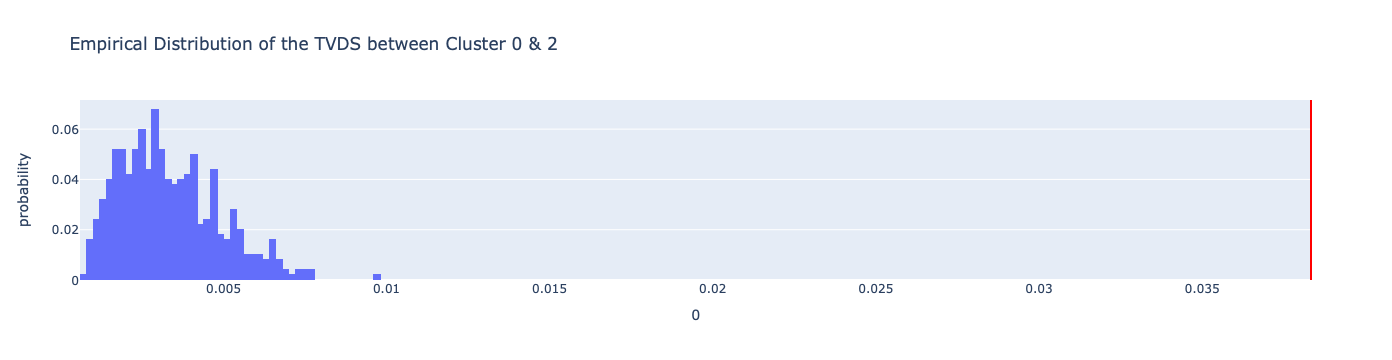

In [49]:
fig = px.histogram(pd.DataFrame(tvds), x=0, nbins=50, histnorm='probability', 
                   title='Empirical Distribution of the TVDS between Cluster 0 & 2')
fig.add_vline(x=observed_tvd, line_color='red')

In [48]:
p_val = (np.array(tvds) >= observed_tvd).mean()
p_val

0.0

With a p-value of 0 in both tests we reject the null hypothesis in favor for the alternative for both tests. 